# Generating random surfaces - Perez method
Often in tribology we will want to generate random surfaces with particular properties, we can use these ase roughness in simulations to investigate how our contact changes with specific roughness parameters. Slippy contains several methods for making randomly rough surfaces. These are:

- RandomFilterSurface
- RandomPerezSurface
- HurstFractalSurface

These methods vary in terms of performance and flexibility: 

Filtering of random sequences, as provided by RandomFilterSurface allows the user to specify the autocorrelation function of the surface profile and gives some flexability over the distribution of surface heights. 

The Perez method allows the power spectral density and the height function to be set. The method will give a surface that perfectly matches one of these specifications and matches the other to a settable tollerance. 

Hurst fractals allow control over the frequeny components present in the surface. The amplitude of each component is define by a simple function in the frequency domain. This gives no control over the height distribution.

---
In this notebook we will run through an example of generating a random rough surface by the perez method.

Lets start by importing everything we will need, and setting the random seed so we always get the same sequence of random numbers. This just ensures that the surfaces generated will be the same every time this is run.

In [1]:
import slippy.surface as s      # surface generation and manipulation
import numpy as np              # numerical functions
import scipy.stats as stats     # statistical distributions
import matplotlib.pyplot as plt # plotting
np.random.seed(1)

# RandomPerezSurface
The RandomPerezSurface class implements the method described in the reference below:

Francesc Pérez-Ràfols, Andreas Almqvist,
Generating randomly rough surfaces with given height probability distribution and power spectrum,
Tribology International,
Volume 131,
2019,
Pages 591-604,
ISSN 0301-679X,
https://doi.org/10.1016/j.triboint.2018.11.020.
(http://www.sciencedirect.com/science/article/pii/S0301679X18305607)
    
This method itteates between a surface with the required height function and another surface with the required PSD. As the iterations progress, these surfaces converge. 

This random surface requires us to set the height probability density function and the power spectral density of the output surface. Unlike the random filter method this method can only generate a single realisation of the random surface, further realisations require the optimisation problem to be solved again, with new random values. However, this method converges much more quickly than the filter method.

---

We will start by generating a realistic power spectrum, the origin of this spectrum should be in the top left corner as in the shown example:

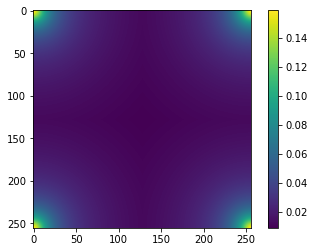

In [2]:
beta = 10 # the drop off length of the acf
sigma = 1 # the roughness of the surface
qx = np.arange(-128,128)
qy = np.arange(-128,128)
Qx, Qy = np.meshgrid(qx, qy)
Cq = sigma**2*beta/(2*np.pi*(beta**2+Qx**2+Qy**2)**0.5) # the PSD of the surface
Cq = np.fft.fftshift(Cq)
plt.imshow(Cq)
plt.colorbar()

Next we will generate a height probability density function:

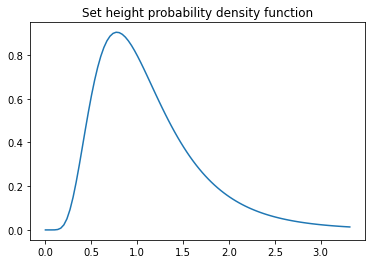

In [3]:
a = 0.5
height_distribution = stats.lognorm(a)
x = np.linspace(stats.gamma.ppf(0.01, a),
                stats.gamma.ppf(0.99, a), 100)
plt.plot(x, height_distribution.pdf(x))
_ = plt.gca().set_title("Set height probability density function")

Now we can make a surface realisation:

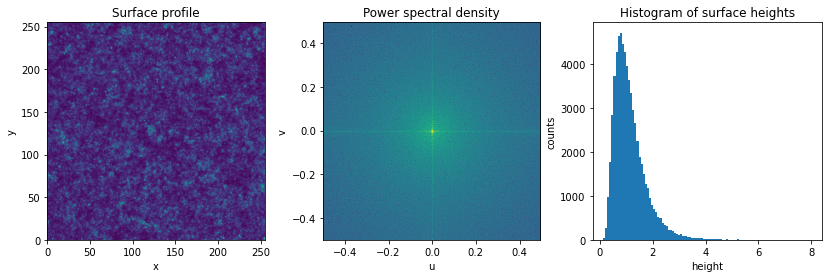

In [4]:
my_surface = s.RandomPerezSurface(target_psd = Cq, height_distribution=height_distribution,
                                  grid_spacing=1,
                                  generate=True)
_ = my_surface.show(['profile', 'psd', 'histogram'], figsize = (14,4))

We can make another random surface with normally distibuted heights as follows:

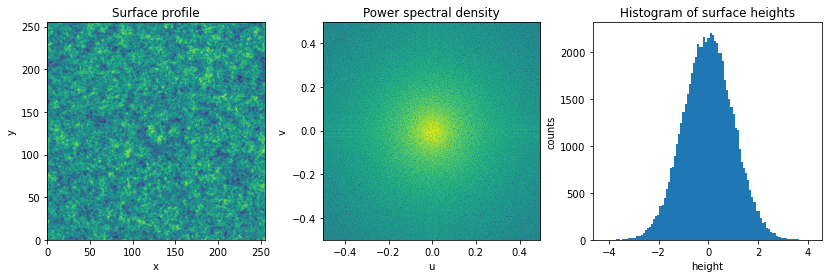

In [5]:
np.random.seed(1)
normal_distribution = stats.norm()
my_surface = s.RandomPerezSurface(target_psd = Cq, height_distribution=normal_distribution,
                                  grid_spacing=1,
                                  generate=True, exact='heights')
_ = my_surface.show(['profile', 'psd', 'histogram'], figsize = (14,4))

As shown the surfaces do not perfectly fit the PSD, however the height function is well represented, a better fit to the PSD can be achieved by using the psd estimate from the original paper:

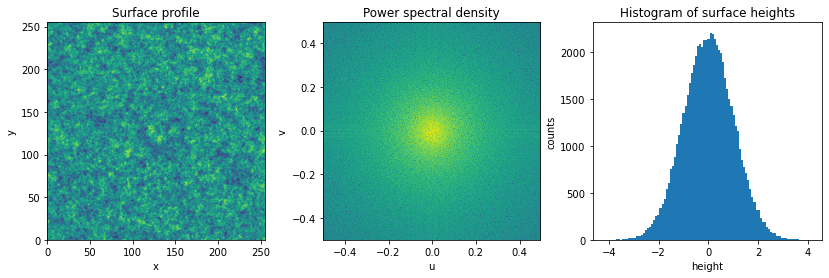

In [6]:
np.random.seed(1)
normal_distribution = stats.norm()
my_surface = s.RandomPerezSurface(target_psd = Cq, height_distribution=normal_distribution,
                                  grid_spacing=1,
                                  generate=True, exact='psd')
_ = my_surface.show(['profile', 'psd', 'histogram'], figsize = (14,4))